In [1]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

In [4]:
model_1 = CmdStanModel(stan_file='code_1.stan')
f= 5
l = 7
N = (f+l)*100
model_1_fit=model_1.sample(data = {'N': N}, chains=1, iter_warmup=1000, iter_sampling=1)


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [5]:
model_2 = CmdStanModel(stan_file='code_2.stan')
f= 5
l = 7
N = (f+l)*100
model_2_fit=model_2.sample(data = {'N': N}, chains=1, iter_warmup=1000, iter_sampling=1)
                   

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


## Exercise 2


In [9]:
y_1 = model_1_fit.stan_variable('y').flatten()
y_2 = model_2_fit.stan_variable('y')

len(y_1)


1200

(array([  9., 372., 752.,  58.,   1.,   0.,   1.,   2.,   1.,   4.]),
 array([-4.67725 , -2.565325, -0.4534  ,  1.658525,  3.77045 ,  5.882375,
         7.9943  , 10.106225, 12.21815 , 14.330075, 16.442   ]),
 <BarContainer object of 10 artists>)

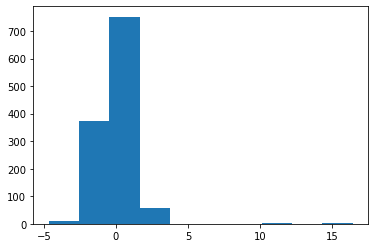

In [10]:
plt.hist(y_1)

In [15]:
model_3 = CmdStanModel(stan_file='code_3.stan')

f= 5
l = 7
N = (f+l)*100

model_3_fit=model_3.sample(data = {'N': N, 'y':y_1},chains=1, iter_warmup=1000, iter_sampling=1)
                     




                        

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                     


INFO:cmdstanpy:CmdStan done processing.


In [16]:
model_4 = CmdStanModel(stan_file='code_3.stan')

model_4_fit=model_4.sample(data = {'N': N, 'y':y_1},chains=1, iter_warmup=1000, iter_sampling=1)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                     


INFO:cmdstanpy:CmdStan done processing.


In [18]:
print(model_3_fit.stan_variable('sigma'))
print(model_3_fit.stan_variable('mu'))

[1.51063]
[0.0479957]


In [19]:
print(model_4_fit.stan_variable('sigma'))
print(model_4_fit.stan_variable('mu'))
print(model_4_fit.stan_variable('nu'))

[1.45544]
[0.120217]


ValueError: Unknown variable name: nu